# **언어모델**



고려대 정순영 교수 강의안

https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/09/16/LM/

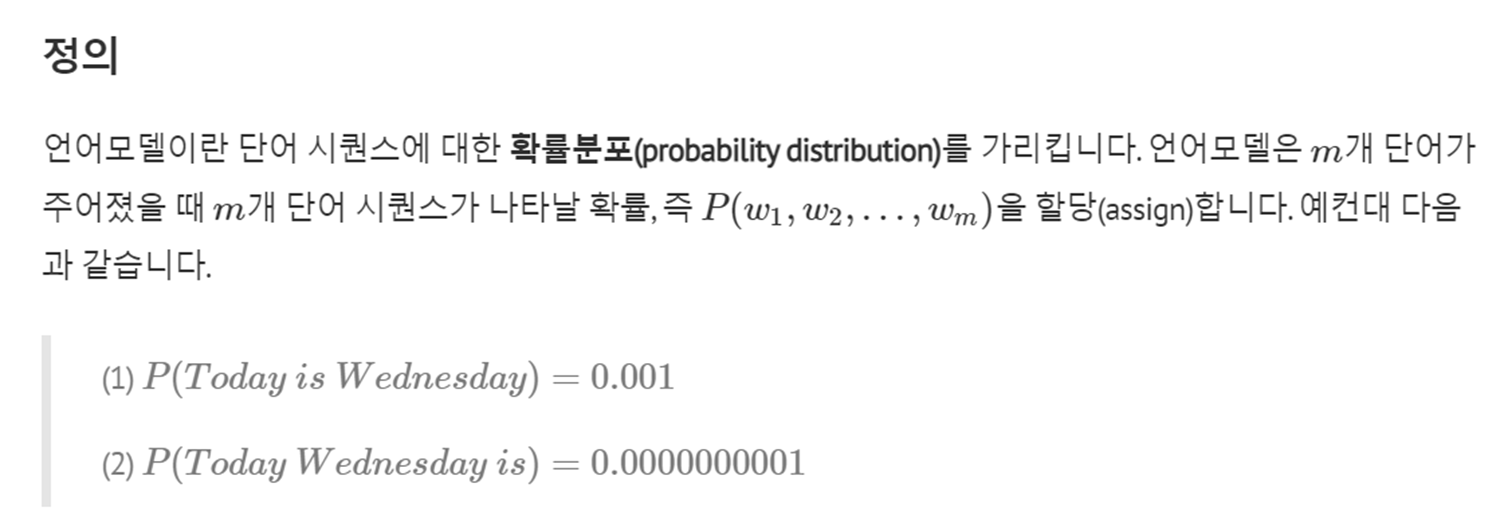

# **확률 통계 모형**

https://bab2min.tistory.com/666

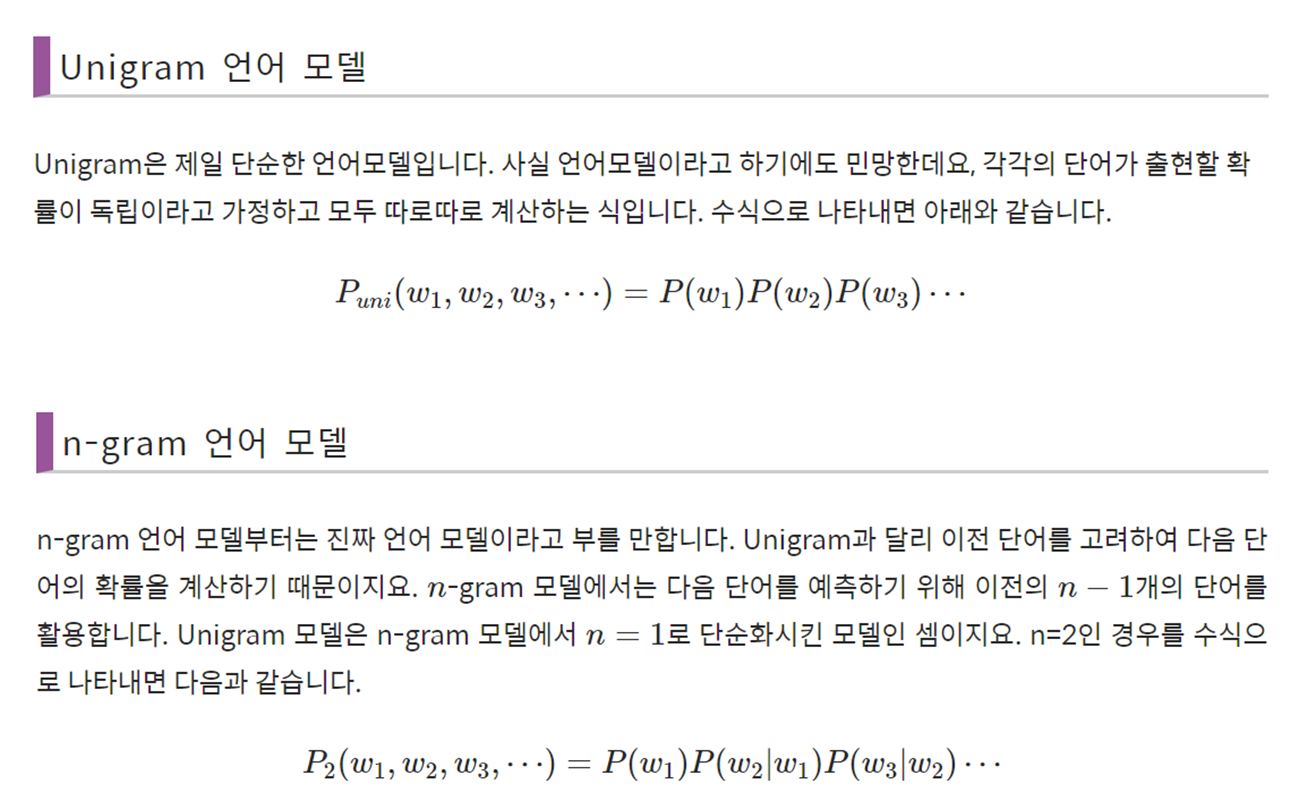

In [ ]:
# prompt: unigram과 ngram 언어모델을 구현해줘

import re
from collections import defaultdict

def preprocess_text(text):
  """텍스트를 전처리합니다."""
  text = text.lower()  # 소문자 변환
  text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
  return text

def create_unigram_model(text):
  """유니그램 언어 모델을 생성합니다."""
  words = preprocess_text(text).split()
  unigram_counts = defaultdict(int)
  for word in words:
      unigram_counts[word] += 1
  total_words = len(words)
  unigram_model = {word: count / total_words for word, count in unigram_counts.items()}
  return unigram_model

def create_ngram_model(text, n):
  """N-gram 언어 모델을 생성합니다."""
  words = preprocess_text(text).split()
  ngram_counts = defaultdict(int)
  for i in range(len(words) - n + 1):
    ngram = tuple(words[i:i + n])
    ngram_counts[ngram] += 1

  ngram_model = defaultdict(lambda: defaultdict(int))

  for i in range(len(words) - n + 1):
      ngram = tuple(words[i:i + n])
      if n > 1:
          prefix = ngram[:-1]
          ngram_model[prefix][ngram[-1]] += 1
      else:
          ngram_model[ngram[0]] = ngram_counts[ngram]

  for prefix in ngram_model:
      total_count = sum(ngram_model[prefix].values())
      for word in ngram_model[prefix]:
          ngram_model[prefix][word] /= total_count
  return ngram_model

# 예시 사용
text = "안녕하세요. 오늘 날씨가 좋네요. 내일도 날씨가 좋았으면 좋겠어요."

unigram_model = create_unigram_model(text)
print("유니그램 모델:")
for key, value in unigram_model.items():
    print(f"{key}: {value}")

bigram_model = create_ngram_model(text, 2)

print("\n바이그램 모델:")
for key, value in bigram_model.items():
    print(f"{key}: {value}")

trigram_model = create_ngram_model(text, 3)
print("\n트라이그램 모델:")
for key, value in trigram_model.items():
    print(f"{key}: {value}")

In [ ]:
pip install konlpy

In [ ]:
from konlpy.corpus import kolaw

# 헌법 말뭉치 (kolaw)
constitution = kolaw.open('constitution.txt').read()
print(constitution[:100])

In [ ]:

bigram_model = create_ngram_model(constitution, 2)

print("\n바이그램 모델:")
for key, value in bigram_model.items():
    print(f"{key}: {value}")

In [ ]:
# bigram_model의 value에 인자수가 가장 큰 5개 출력
sorted_bigrams = sorted(bigram_model.items(), key=lambda item: len(item[1]), reverse=True)
print("인자수가 가장 큰 5개의 바이그램:")
for key, value in sorted_bigrams[:5]:
    print(f"{key}: {value}")

In [ ]:
from konlpy.corpus import kobill

# 국회 의안 말뭉치 (kobill)
bill = kobill.open('1809890.txt').read()
print(bill[:100])

In [ ]:

bigram_model = create_ngram_model(bill, 2)

print("\n바이그램 모델:")
for key, value in bigram_model.items():
    print(f"{key}: {value}")